# Bases de Machine Learning

## O que é Machine Learning?

Alguém tem alguma ideia de como funciona um modelo preditivo?

Alguns exemplos para tornar mais concreto possíveis lógicas de funcionamento:

- como prever se uma dada ação na Bolsa de Valores irá subir ou descer amanhã?

- como escolher a ação mais adequada para controlar um veículo autônomo em função do que ele percebe do mundo em volta de si?

- amanhã irá chover?

- qual das milhões de transações que uma operadora de cartão de crédito está recebendo nesse segundo corresponde a fraudes e deveriam ser bloqueadas?

- considerando uma centena de processos judiciais, de que trata cada um deles se você só tem acesso ao conteúdo textual de suas peças?


Ou uma pergunta mais simples ainda: 
> **Quanto deveria custar uma casa?**  
> Dadas as características de uma casa (área útil, endereço, número de cômodos, qualidade de acabamentos, etc.) como estimar o seu valor de mercado?

Pense no que seria necessário para que você conseguisse formular um bom palpite.
E se agora você desejasse automatizar esse processo, como faria? Como comunicar para a máquina o processo decisional envolvido na formulação desse palpite?

Todos esses elementos fazem parte de Machine Learning: a "arte" de ensinar a máquina a reconhecer padrões em observações, que possam ser generalizadas para previsões de características de novas observações.

## Exemplo concreto para estimativa de valor de um imóvel

Captura de tela de oferta do site Wimóveis: 
https://www.wimoveis.com.br/propriedades/clnw-110-111-noroeste-1-quarto-1-vaga-37-m-sup2-2951056060.html
![](https://i.imgur.com/yV3Zqw8.png)

Qual o seu palpite quanto ao valor esperado desse imóvel? 
Como fazer para estimar esse valor?

Escreva abaixo seu palpite e o que você considerou para chegar nessa estimativa:

In [2]:
import numpy as np

# O que você escrever na célula de código depois de um símbolo '#' não será executado pelo computador
# 
#

In [3]:
# Lista agora as variáveis que lhe parecem mais importantes para estimar esse valor
# localização: bairro
# metragem
#
#

In [4]:
# Ordene a lista acima da variável que lhe parece mais importante até a que lhe parece menos importante
#
#
#
#

In [5]:
# Como você faria para atribuir um valor monetário de contribuição para o preço total para cada uma dessas variáveis?
# Por exemplo: possuir uma área útil maior tem mais valor 
# então vou multiplicar a área útil por R$ 10.000,00 para ter uma estimativa de custo do apartamento
# Liste abaixo o valor que você daria para cada variável de destaque que apontou acima
#
#
#
#

In [6]:
# Como avaliar se os valores que você chutou para cada variável são bons?
# Ou como estimar automaticamente esses valores para cada item de característica do imóvel?
#
#
#
#

Captura de tela de outra oferta do site Wimóveis: 
https://www.wimoveis.com.br/propriedades/cobertura-no-via-parque-noroeste-2944165550.html
![](https://i.imgur.com/esx19p5.png)


In [7]:
# com base nas estimativas de valor associado a cada variável anterior, estime qual seria o valor desse imóvel:
#
#

## Automação da construção do modelo anterior

Agora se tivermos que realizar as melhores previsões possíveis para centenas de imóveis, com grande variedade de tamanhos, bairros, número de quarto, banheiros, vagas, suítes, idades de construção, etc. Como encontrar os pesos ótimos para cada variável que permite ter o menor erro possível em nossas previsões?

Como avaliar esse erro? Ou seja como avaliar a qualidade de um modelo?


Vamos continuar com esse modelo que começamos intuitivamente acima e que se chama "regressão linear".
Consideraremos que o preço de um imóvel é uma soma ponderada de suas características (área, número de quartos, de banheiros, etc.) sendo que esse peso ou valor associado a essa característica é um parâmetro interno do modelo, que não conhecemos de antemão, mas vamos descobrir com base em dados de vendas passadas de outros imóveis!

\begin{equation}
Preço = ValorPonderadoMetroQuadrado * área + ValorPonderadoNúmeroQuartos * númeroQuartos + ...
\end{equation}

Essa equação acima seria o nosso modelo, muito simples, de soma ponderada das características. Agora, como descobrir esses fatores de ponderação?

Uma animação para sugerir uma resposta, para o caso mais simples de uma única variável indepedente X e uma variável dependente y. Nesse caso a equação fica:
\begin{equation}
y = a * X + b
\end{equation}

![](https://miro.medium.com/max/1400/1*tXBtjkYLd01c25EbnXCvow.gif)


Então precisamos de dados de transações imobiliárias passadas para conseguir estimar o valor desses pesos da equação.
Onde obter esses dados? O Wimóveis não facilita nossa obtenção desses dados! Seria viável extrair esses dados do site utilizando técnicas de web scraping, que fogem do nosso escopo no momento.

Outra abordagem é de utilizar uma base de dados já pronta!
Dados de venda de imóveis da cidade de Boston, já embutida na nossa biblioteca de machine learning:
https://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset



In [8]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()
type(boston)

sklearn.utils.Bunch

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [12]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [13]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
# Queremos prever a variável dependente de preço:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [15]:
# importamos um modelo de regressão linear da biblioteca sklearn
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X=df, y=boston.target)

LinearRegression()

In [18]:
# O que falta para esse código funcionar? O que seria a variável X para avaliar o modelo?
X=df
y=boston.target
lr.score(X, y)

0.7406426641094094

In [19]:
lr.predict(df.iloc[0:3])

array([30.00384338, 25.02556238, 30.56759672])

In [20]:
# Outra intuição de como prever um resultado: comparando com outros casos similares!
# KNN ou K nearest neighbors: k vizinhos mais próximos
from sklearn.neighbors import KNeighborsRegressor

In [21]:
KNeighborsRegressor(n_neighbors=5).fit(X, y).score(X,y)

0.716098217736928

In [22]:
KNeighborsRegressor(n_neighbors=2).fit(X, y).score(X,y)

0.8562711854960806

In [23]:
KNeighborsRegressor(n_neighbors=1).fit(X, y).score(X,y)

1.0

*Como interpretar os resultados acima?*

Como garantir que o seu modelo **generalize** e não apenas **decore** resultados?


Podemos treinar o modelo com alguns dados, mas avaliá-lo sobre novos dados, não utilizados durante o treinamento!

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
KNeighborsRegressor(n_neighbors=1).fit(X_train, y_train).score(X_test,y_test)

0.4179206827765607

In [27]:
KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train).score(X_test,y_test)

0.5554646251776688

In [28]:
KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train).score(X_test,y_test)

0.6473640882039258

In [29]:
# Interpretar?

# E como fica a generalização do nosso modelo de regressão linear?
LinearRegression().fit(X_train, y_train).score(X_test, y_test)

0.6687594935356278

## Regressão em novo dataset

Agora é a sua vez! Veja as possibilidades de dataset de regressão da lista do sklearn e siga os mesmos passos que fizemos acima, para construir e interpretar um modelo de regressão linear sobre esses dados: https://scikit-learn.org/stable/datasets/index.html

Escolhemos analisar o conjunto de dados de diabetes: `diabetes dataset`


In [30]:
from sklearn.datasets import load_diabetes

In [31]:
diabetes = load_diabetes()

In [32]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [33]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [34]:
# Agora é com vocês! Escrevam (ou copiem/adaptem) código para construir seus modelos de previsão:

# 1.importar seus dados de diabetes nas variáveis independentes 'X' e dependente 'y':
# Mapear os dados diabetes.data e diabetes.target nessas variáveis X e y
X = diabetes.data
y = diabetes.target

In [35]:
# 2. divida os dados entre treino e teste, com as variáveis de nomes X_train, y_train, X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
# 3. instancie, treine (ajuste) e avalie o desempenho de um modelo de k vizinhos mais próximos (KNeighborsRegressor) 
# Pode testar com números diferentes de vizinhos e descobrir qual o tamanho da vizinhança que gera os melhores resultados
def achar_bestKNN(X_train, y_train, X_test, y_test, max_n=11):
    bestN = 1
    bestScore = 0
    bestModel = None
    for n in range(1,max_n+1):
        model = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
        local_score = model.score(X_test,y_test)
        if local_score > bestScore:
            bestScore = local_score
            bestN = n
            bestModel = model
            
    return (bestN, bestScore, bestModel)

bestKNN = achar_bestKNN(X_train, y_train, X_test, y_test)
bestKNN

(6, 0.4426043044910202, KNeighborsRegressor(n_neighbors=6))

In [37]:
# 4. instancie, treine (ajuste) e avalie o desempenho de um modelo de regressão linear (LinearRegression)
reg_model = LinearRegression().fit(X_train, y_train)
reg_model.score(X_test, y_test)

0.45260660216173787

In [38]:
# Vamnos interpretar mais em detalhes o modelo de regressão linear que treinamos:

pesos = pd.DataFrame({'Variável': diabetes.feature_names, 'Coeficientes': reg_model.coef_})
pesos

,Variável,Coeficientes
0,age,37.900314
1,sex,-241.966248
2,bmi,542.425753
3,bp,347.708305
4,s1,-931.461261
5,s2,518.044055
6,s3,163.403535
7,s4,275.310038
8,s5,736.189098
9,s6,48.671125


In [39]:
# Prever resultados
y_pred = reg_model.predict(X_test)

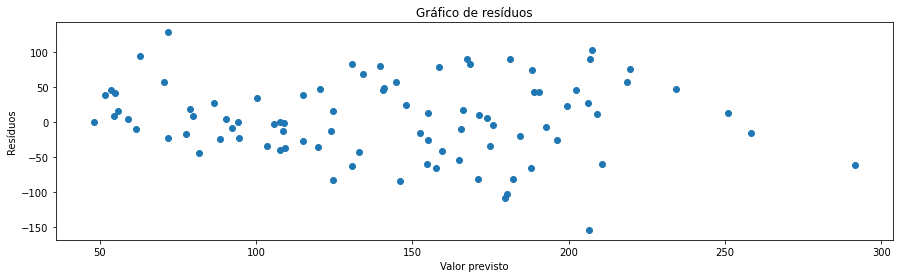

In [40]:
# Gráfico de resíduos (diferença entre a predição e o valor verdadeiro esperado)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.scatter(y_pred,y_test-y_pred)
plt.title("Gráfico de resíduos")
plt.xlabel("Valor previsto")
plt.ylabel("Resíduos")
plt.show()

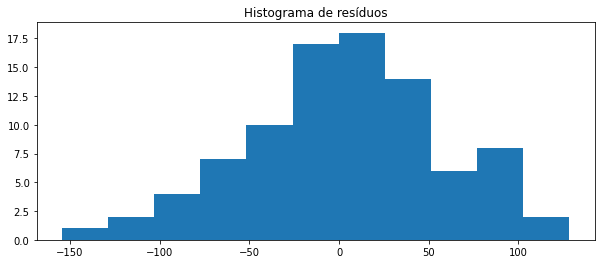

In [41]:
plt.figure(figsize=(10,4))
plt.hist(y_test-y_pred, bins= 11)
plt.title("Histograma de resíduos")
plt.show()

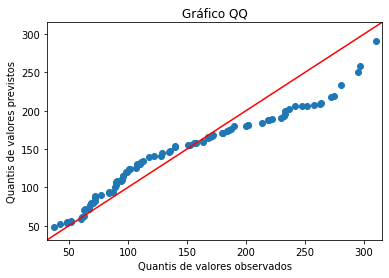

In [42]:
## Gráfico QQ
from statsmodels.graphics.gofplots import qqplot_2samples

qqplot_2samples(y_test,y_pred,line='45')
plt.title("Gráfico QQ")
plt.xlabel("Quantis de valores observados")
plt.ylabel("Quantis de valores previstos")
plt.show()

## Conclusões

Agora você tem primeiras noções do que é Machine Learning e pode prever resultados numéricos que dependam de outras variáveis, treinando modelos simples como KNN ou regressão linear!

E em outras situações mais complexas? Se os seus dados além de serem numéricos também utilizarem dados categóricos (por exemplo, sexo ou estado de residência) ou textuais? 
É possível adaptar o código utilizado acima, transformando esses outros tipos de dados em numéricos (encoding) ou ainda utilizar outros modelos mais complexos, como árvores de decisão ou Random Forest.
Há vários outros elementos técnicos essenciais para que o modelo que você for treinar tenha um melhor desempenho: balanceamento dos seus dados de treinamento, lidando com dados faltantes, combinando diversos modelos em um novo modelo híbrido (ensemble), automatizando a otimização do seu modelo procurando os melhores híper-parâmetros que controlam o modelo durante o treinamento e, sobretudo, como interpretar o modelo treinado, extraindo insights úteis para o negócio, como convencer os gestores de que as previsões do modelo são de alta qualidade e confiáveis e que podem ser utilizadas no suporte à decisão?

Tudo isso e muito mais você poderá aprofundar ao longo do curso de ML!

In [46]:
from autoML import AutoML

df = pd.DataFrame(data=X, columns = diabetes.feature_names)
df['y'] = y

autoML = AutoML(df, 'y')
autoML.getResults()

,algorithm,features,n_features,train_time,mem_max,r2,neg_mean_absolute_error,neg_mean_squared_error
0,LinearRegression,"(bmi, bp, s4, s5, s6)",5,6.975134,215.457031,0.292177,-0.166837,-0.037287
1,KNeighborsRegressor,"(bmi, bp, s4, s5, s6)",5,5.001247,215.484375,0.187208,-0.175323,-0.042667
2,SVR,"(bmi, bp, s4, s5, s6)",5,5.238061,215.292969,0.169754,-0.173900,-0.043499
3,DecisionTreeRegressor,"(bmi, bp, s4, s5, s6)",5,4.995181,215.707031,-0.447892,-0.227349,-0.073854
